수정주가(Adjusted Price)란?


* Source : https://github.com/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%88%98%EC%A0%95%EC%A3%BC%EA%B0%80.ipynb

요약

1. 수정주가(Adjusted Price)란 총 발행 주식수의 변화를 반영한 가격입니다
2. 백테스트나 수익률 분석을 위해서는 수정주가를 사용합니다
3. FinanceDataReader 모든 가격을 수정가격(Adjusted Price)로 제공합니다

수정주가(Adjusted Price) 개요


수정주가(Adjusted Price)란 총 발행 주식수의 변화를 반영한 가격을 말합니다. 액면분할, 액면병합, 유상증자, 무상증자와 같이 총 발행주식수의 변화가 발생하면 가격의 변화가 생깁니다. 예를 들어, 어떤 회사가 액면분할을 통해 1주를 2개로 쪼갠다고 하면, 주식수를 2배로 늘어나고 주식의 가격은 1/2로 낮아지며 시가총액은 동일하게 유지 됩니다.

삼성전자 액면분할
실제 예를 들어보죠.

2018년 5월 4일, 삼성전자는 50:1로 액면분할을 합니다. 1주가 50주로 쪼개지는 것이죠.



![nn](samsung.png)

액면분할을 위해 2018-04-30 부터 2018-05-03 까지 3일간 거래정지되고 2018-05-04 부터 액면분할된 가격으로 거래가 시작된 것을 확인할 수 있습니다.

이때 5000원인 삼성전자 주식 액면가는 액면분할 후 100원이 되었습니다. 액면분할 전에 주당 265만원(4월30일 기준)에서 5만3천원이 되었습니다.

위 표에는 표시되어 있지 않지만 2018-05-03일 총 주식수 128,386,494주에서 다음날 총 주식수는 6,419,324,700주 로 50배가 늘어났습니다. 즉 50:1로 액면분할을 한 것이죠.

만일 이 가격 데이터를 수정하지 않고 그대로 사용한다면 주가가 하루만에 1/50로 다시말해 -98% 하락한 것이 됩니다.

백테스트를 하기 위해서는 주식 가격 데이터의 연속성이 보장되어야 합니다. 가격의 연속성을 보장하기 위해서는 반드시 발행 주식수를 변화를 함께 고려해야 합니다. 발행주식수의 변화를 반영한 가격을 수정주가(Adjusted Price)라고 합니다.

수정가격은 보통 오늘 가격과 총 주식수를 과거 데이터에 반영하여 구합니다. 혹은 특정 테스트 범위의 가장 마지막 날의 가격과 총 주식수를 기준으로 과거 가격들을 수정합니다.

주가는 보통 종가(Close)를 기준으로 하기 때문에 수정주가로 가장 많이 쓰이는 것이 바로 수정 종가(Adjust Close Price) 입니다.

In [1]:
!pip install IPython 
from IPython.display import Image

In [4]:
import FinanceDataReader as fdr

df=fdr.DataReader('005930','2018-04-25','2018-05-31')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-25,49220,50500,49220,50400,332292,-0.001189
2018-04-26,50420,52160,50400,52140,360931,0.034524
2018-04-27,53380,53639,52440,53000,606216,0.016494
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319


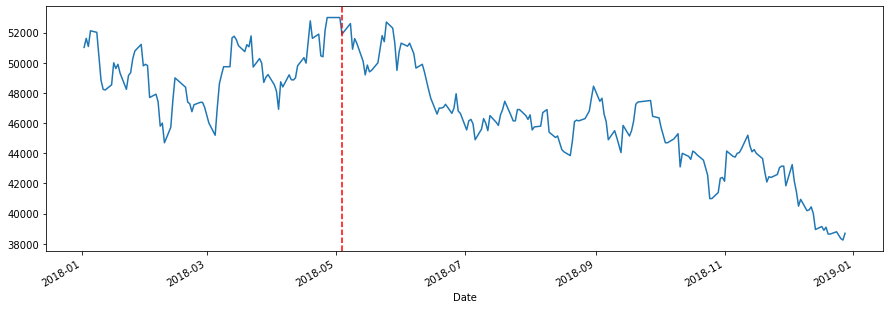

In [3]:
df=fdr.DataReader('005930','2018-01-01','2018-12-31')
ax=df['Close'].plot(figsize=(15,5))

ax.axvline('2018-05-04',ls='--',color='r')